In [1]:
#importer vos libs 
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
from sklearn import linear_model 
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

In [2]:
dataTrain = pd.read_csv("./MachineLearning/titanic/train.csv")
dataTrainCleared = pd.read_csv("./MachineLearning/titanic/train.csv")
dataTest = pd.read_csv("./MachineLearning/titanic/test.csv")
dataTrain

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
print(dataTrainCleared.shape)
print(dataTest.shape)
missing_values_train = dataTrainCleared.isnull()
missing_values_test = dataTest.isnull()

(891, 12)
(418, 11)


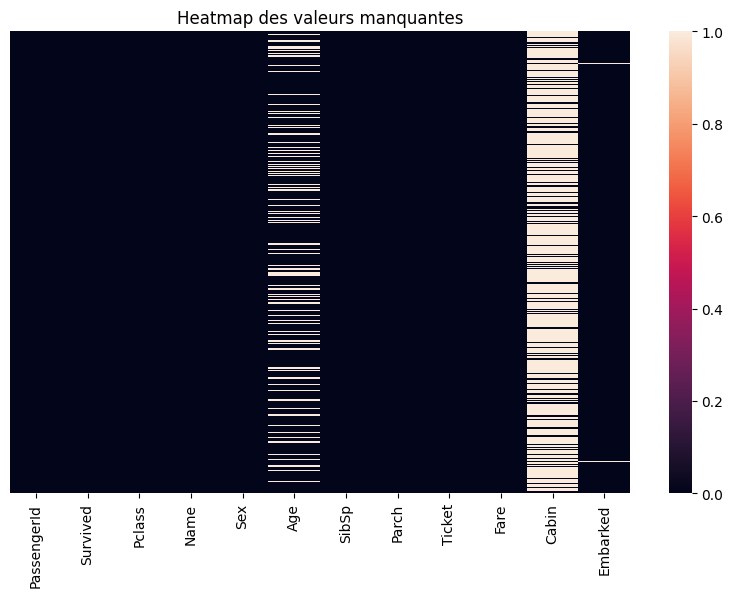

In [4]:
plt.figure(figsize=(10, 6))
sns.heatmap(missing_values_train, cbar=True, yticklabels=False)
plt.title('Heatmap des valeurs manquantes')
plt.show()

In [5]:
missing_percentage_age = (missing_values_train["Age"].sum() / len(dataTrainCleared)) * 100
missing_percentage_age

19.865319865319865

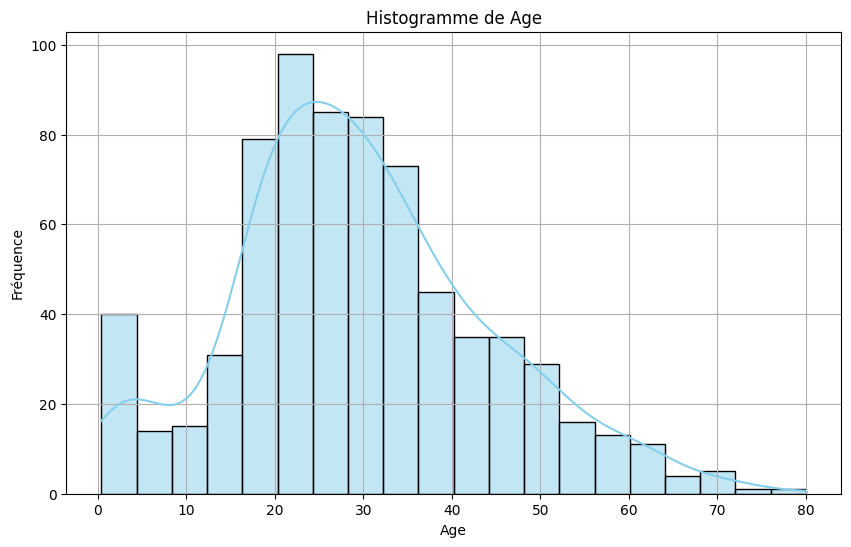

In [6]:
plt.figure(figsize=(10, 6))
sns.histplot(dataTrain['Age'], bins=20, color='skyblue', kde=True)
plt.title('Histogramme de Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [7]:
age_median = dataTrainCleared['Age'].median()
age_mean = dataTrainCleared['Age'].mean()

In [8]:
print(age_median, ' / ', age_mean)

28.0  /  29.69911764705882


# Cabin

In [9]:
missing_percentage_cabin = (missing_values_train["Cabin"].sum() / len(dataTrainCleared)) * 100
missing_percentage_cabin

77.10437710437711

# Distribution

<Figure size 1000x600 with 0 Axes>

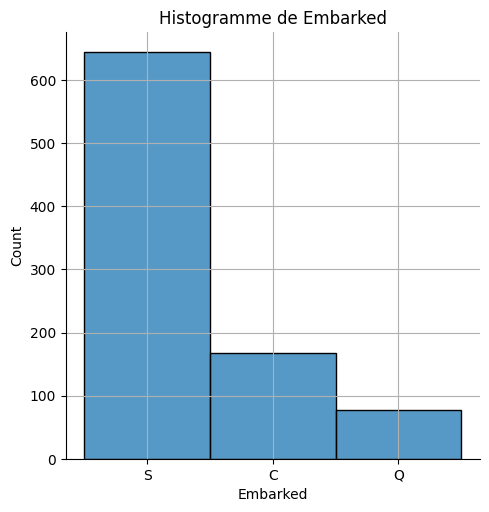

In [10]:
plt.figure(figsize=(10, 6))
sns.displot(dataTrainCleared['Embarked'])
plt.title('Histogramme de Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.grid(True)
plt.show()

In [11]:
dataTrainCleared['Age'].fillna(28, inplace=True)

In [12]:
dataTrainCleared['Embarked'].fillna("S", inplace=True)

In [13]:
dataTrainCleared.drop('Cabin', axis=1, inplace=True)

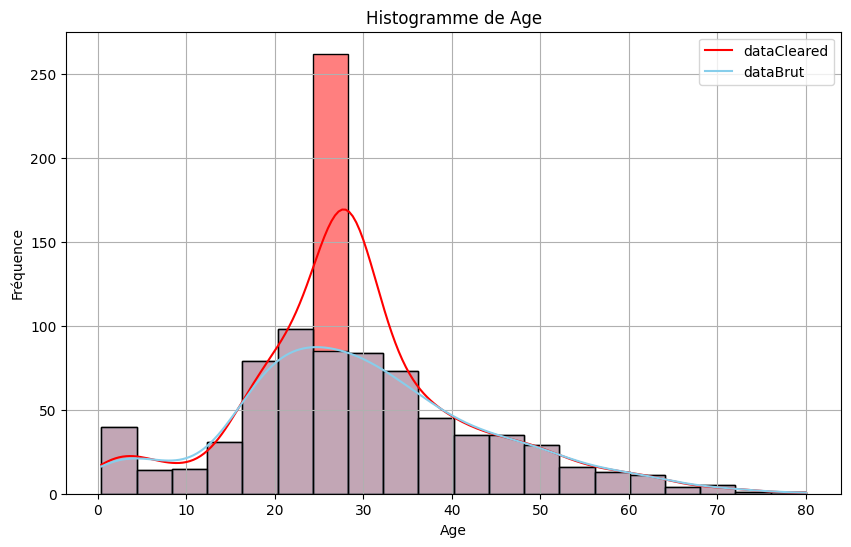

In [25]:
plt.figure(figsize=(10, 6))
sns.histplot(dataTrainCleared['Age'], bins=20, color='red', kde=True, label="Valeurs nettoyées")
sns.histplot(dataTrain['Age'], bins=20, color='skyblue', kde=True, label="Valeurs bruts")
plt.legend(['dataCleared', 'dataBrut'])
plt.title('Histogramme de Age')
plt.xlabel('Age')
plt.ylabel('Fréquence')
plt.grid(True)
plt.show()

In [15]:
dataTrainCleared['TravelAlone'] = (dataTrainCleared['SibSp'] == 0) & (dataTrainCleared['Parch'] == 0)

In [16]:
dataTrainCleared.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
TravelAlone    0
dtype: int64

In [17]:
dataDummies = pd.get_dummies(dataTrainCleared, columns=['Pclass', 'Embarked', 'Sex'])
dataDummies

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,False,False,True,False,False,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,False,True,False,False,True,False,False,True,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,True,False,False,True,True,False
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,False,True,False,False,False,False,True,True,False
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,True,False,False,True,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,True,False,True,False,False,False,True,False,True
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,True,True,False,False,False,False,True,True,False
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",28.0,1,2,W./C. 6607,23.4500,False,False,False,True,False,False,True,True,False
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,True,True,False,False,True,False,False,False,True


In [18]:
dataDummies.drop('PassengerId', axis= 1, inplace= True)
dataDummies.drop('Name', axis= 1, inplace= True)
dataDummies.drop('SibSp', axis= 1, inplace= True)
dataDummies.drop('Parch', axis= 1, inplace= True)
dataDummies.drop('Sex_female', axis= 1, inplace= True)
dataDummies.drop('Ticket', axis= 1, inplace= True)
dataDummies

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,0,22.0,7.2500,False,False,False,True,False,False,True,True
1,1,38.0,71.2833,False,True,False,False,True,False,False,False
2,1,26.0,7.9250,True,False,False,True,False,False,True,False
3,1,35.0,53.1000,False,True,False,False,False,False,True,False
4,0,35.0,8.0500,True,False,False,True,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,True,False,True,False,False,False,True,True
887,1,19.0,30.0000,True,True,False,False,False,False,True,False
888,0,28.0,23.4500,False,False,False,True,False,False,True,False
889,1,26.0,30.0000,True,True,False,False,True,False,False,True


# Do the same w/ test dataset

In [19]:
dataTest.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [21]:
dataTestCleared = dataTest.copy()
dataTestCleared["Age"].fillna(dataTest["Age"].median(skipna=True), inplace=True)
dataTestCleared["Embarked"].fillna(dataTest['Embarked'].value_counts().idxmax(), inplace=True)
dataTestCleared.drop('Cabin', axis=1, inplace=True)

dataTestCleared.isnull().sum()

dataTestCleared['TravelAlone']=np.where((dataTestCleared["SibSp"]+dataTestCleared["Parch"])>0, 0, 1)

dataDummieTest = pd.get_dummies(dataTestCleared, columns=["Pclass","Embarked","Sex"])
dataDummieTest.head()
dataDummieTest.drop('PassengerId', axis=1, inplace=True)
dataDummieTest.drop('Name', axis=1, inplace=True)
dataDummieTest.drop('SibSp', axis=1, inplace=True)
dataDummieTest.drop('Parch', axis=1, inplace=True)
dataDummieTest.drop('Sex_female', axis=1, inplace=True)
dataDummieTest.drop('Ticket', axis=1,inplace=True)

dataDummieTest

,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male
0,34.5,7.8292,1,False,False,True,False,True,False,True
1,47.0,7.0000,0,False,False,True,False,False,True,False
2,62.0,9.6875,1,False,True,False,False,True,False,True
3,27.0,8.6625,1,False,False,True,False,False,True,True
4,22.0,12.2875,0,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...
413,27.0,8.0500,1,False,False,True,False,False,True,True
414,39.0,108.9000,1,True,False,False,True,False,False,False
415,38.5,7.2500,1,False,False,True,False,False,True,True
416,27.0,8.0500,1,False,False,True,False,False,True,True


# Data Analysis

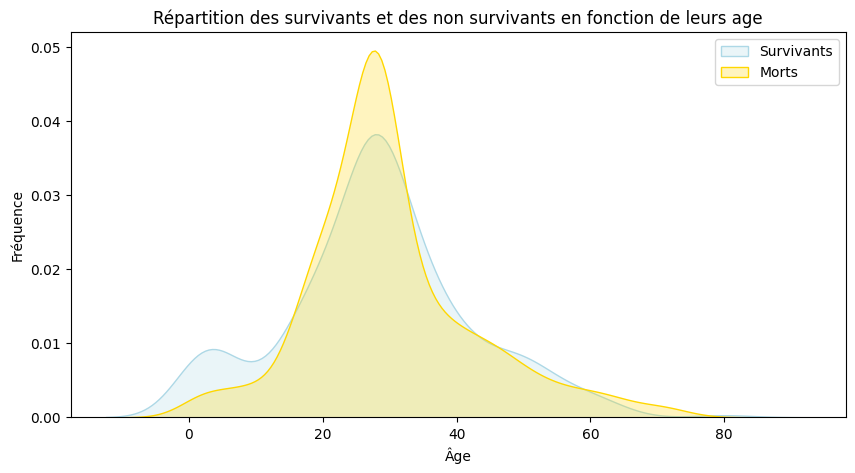

In [26]:
plt.figure(figsize=(10, 5))

sns.kdeplot(dataDummies["Age"][dataDummies.Survived == 1], color="lightblue", fill=True)
sns.kdeplot(dataDummies["Age"][dataDummies.Survived == 0], color="gold", fill=True)

plt.legend(['Survivants', 'Morts'])
plt.title('Répartition des survivants et des non survivants en fonction de leurs age')
plt.xlabel("Âge")
plt.ylabel("Fréquence")
plt.show()

In [28]:
dataDummies['IsMinor']=np.where((dataTrainCleared["Age"])<16, 1, 0)

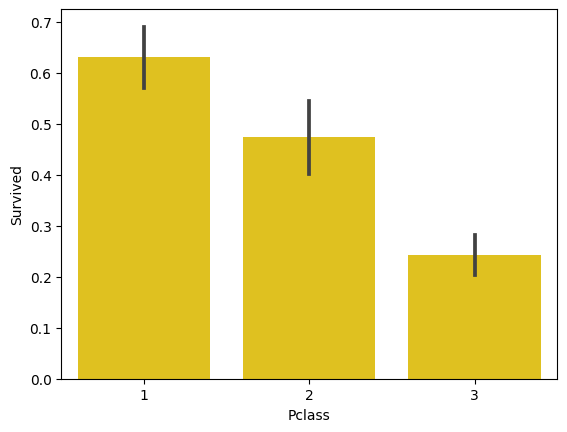

In [32]:
sns.barplot(x='Pclass', y='Survived', data=dataTrainCleared, color="gold")
plt.show()

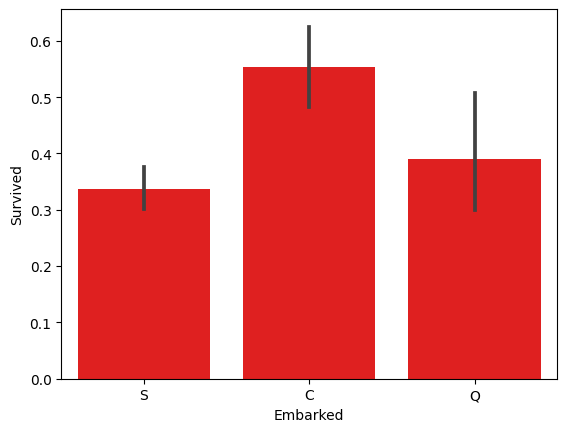

In [34]:
sns.barplot(x='Embarked', y='Survived', data=dataTrain, color="red")
plt.show()

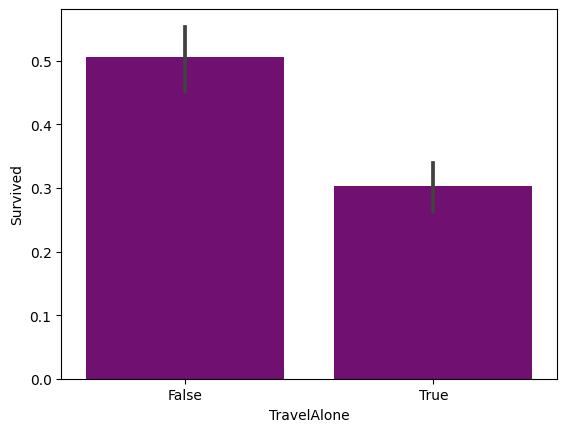

In [36]:
sns.barplot(x='TravelAlone', y='Survived', data=dataTrainCleared, color="purple")
plt.show()

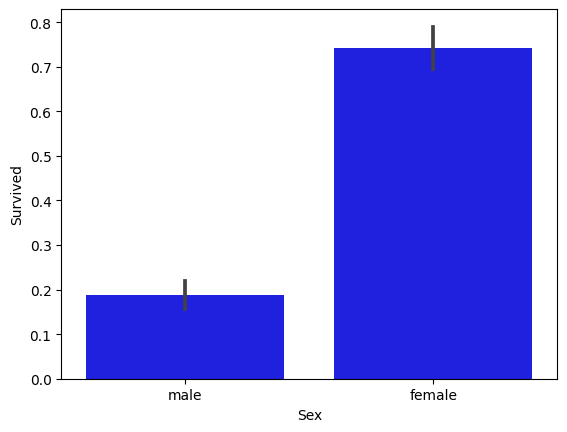

In [38]:
sns.barplot(x='Sex', y='Survived', data=dataTrain, color="blue")
plt.show()

# Regression Logistique

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV

In [41]:
element = ['Age','TravelAlone','Pclass_1','Pclass_2','Embarked_C','Embarked_S','Sex_male','IsMinor',]
X = dataDummies[element]
Y = dataDummies['Survived']

In [43]:
logisticRegression = LogisticRegression(max_iter=1000) #init de la class

In [45]:
rfe = RFE(logisticRegression, n_features_to_select=4)
rfe.fit(X,Y)
selection = X.columns[rfe.support_]

selection

Index(['Pclass_1', 'Pclass_2', 'Sex_male', 'IsMinor'], dtype='object')

In [46]:
rfe = RFE(logisticRegression, n_features_to_select=8)
rfe.fit(X,Y)
selection = X.columns[rfe.support_]

selection

Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')

In [50]:
rfecv = RFECV(logisticRegression, scoring='accuracy')
rfecv.fit(X, Y)

print("nb selected features", rfecv.n_features_)
print(X.columns[rfecv.support_])

nb selected features 8
Index(['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C',
       'Embarked_S', 'Sex_male', 'IsMinor'],
      dtype='object')


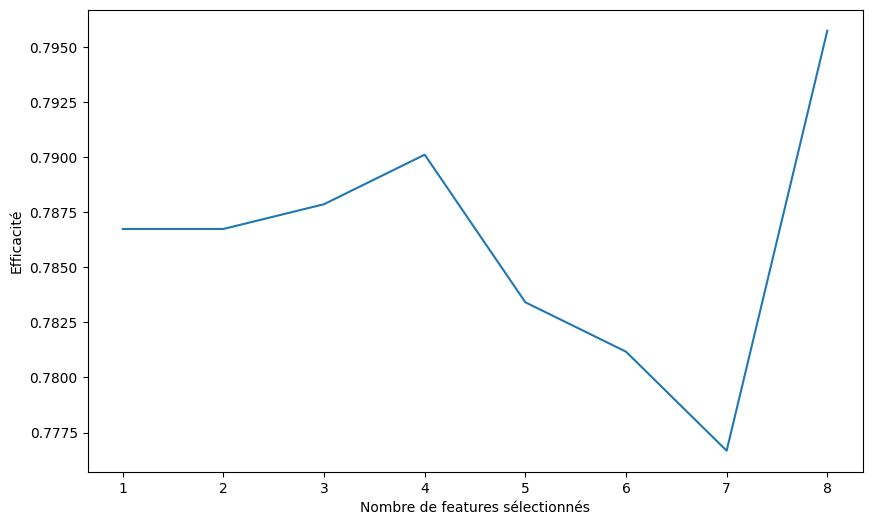

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE, RFECV

X = dataDummies[selection]
y = dataDummies['Survived']

rfecv = RFECV(estimator=LogisticRegression(max_iter=300),scoring='accuracy')
rfecv.fit(X, y)

# Plot number of features VS. cross-validation scores
plt.figure(figsize=(10, 6))
plt.xlabel("Nombre de features sélectionnés")
plt.ylabel("Efficacité")
plt.plot(range(1, len(rfecv.cv_results_['mean_test_score']) + 1), rfecv.cv_results_['mean_test_score'])
plt.show()

In [59]:
dataDummies #891,12 -> 891,8

,Survived,Age,Fare,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_male,IsMinor
0,0,22.0,7.2500,False,False,False,True,False,False,True,True,0
1,1,38.0,71.2833,False,True,False,False,True,False,False,False,0
2,1,26.0,7.9250,True,False,False,True,False,False,True,False,0
3,1,35.0,53.1000,False,True,False,False,False,False,True,False,0
4,0,35.0,8.0500,True,False,False,True,False,False,True,True,0
...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,13.0000,True,False,True,False,False,False,True,True,0
887,1,19.0,30.0000,True,True,False,False,False,False,True,False,0
888,0,28.0,23.4500,False,False,False,True,False,False,True,False,0
889,1,26.0,30.0000,True,True,False,False,True,False,False,True,0
